# Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
data= pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

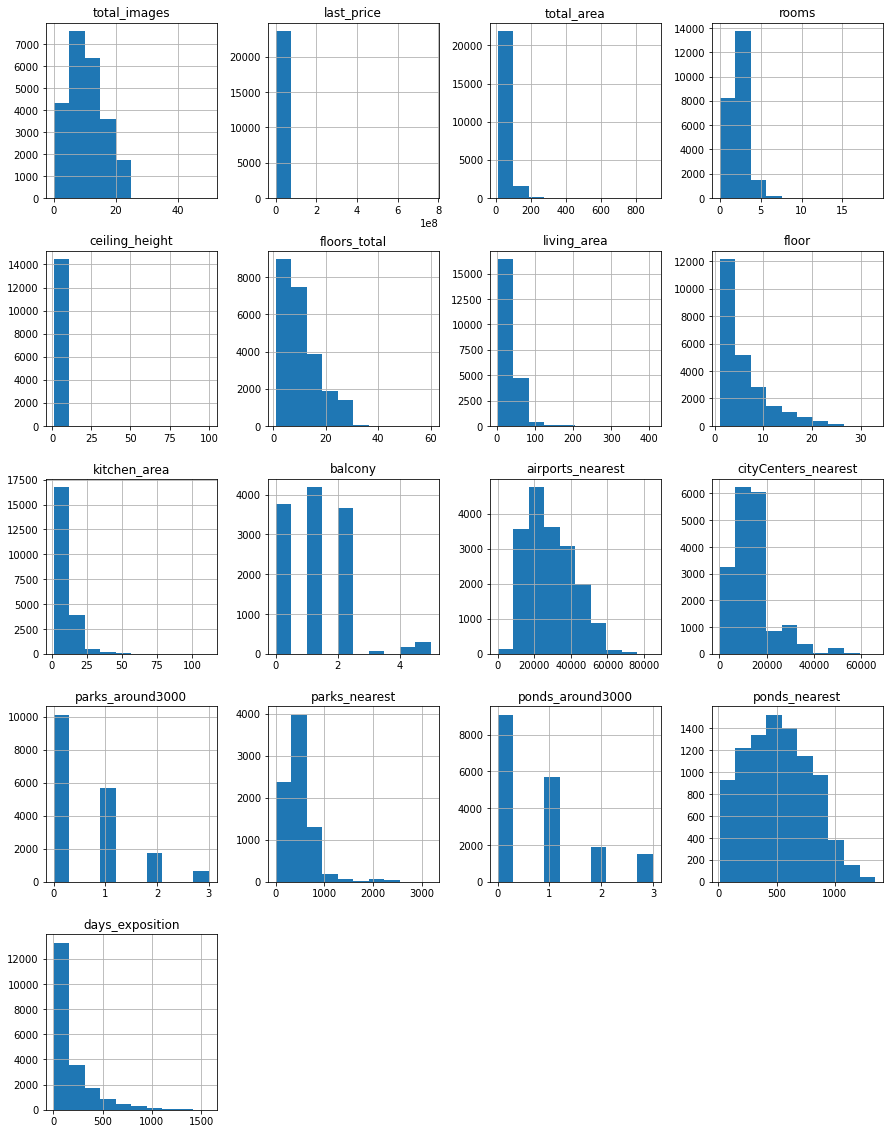

In [2]:
data.hist(figsize=(15, 20))

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Много Nan.
ceiling_height - довольно важная информация, но она отсуствует. Предполагаю, что некоторые не считают это обязательным для заполнения пунктом и поэтому не предприняли никаких действий для того, чтоб узнать высоту своих потолков, иначе бы данные присутствовали. 

is_apartment - могу предположить, что "нет данных" там, где ответ - "0", т.е. это не апартаменты. Причиной может быть следующее: не многие люди (в том числе и я ранее) особо не знали разницы между апартаментами и квартирами, это вело к тому, что люди, которые продавали квартиры, при заполнении формы для создания объявления просто пропускали эти пункты.

 balcony - вполне возможно, что где балкон отсутствует, там вместо 0 стоит NaN. 
 
 
По airports_nearest, cityCenters_nearest: данные рассчитывала система. Они могут отустствовать по причине того, что относительно конкретно взятого населенного пункта/точки искались расстояние в определенном радиусе. Если в пределах этого радиуса ни аэропорта, ни парков не было, то и указать в этом столбце системе было нечего. 

По parks_around3000, ponds_around3000: аналогично как и с parks_nearest и ponds_nearest - данные просто не были заполнены.

days_exposition - довольно важный параметр. Информация может отсутствовать, например, по причине того, что неизвестно когда было закрыто объявление о продаже, т.е., фактически, сделка была совершена, но не была закрыта на онлайн-ресурсе.

### Предобработка данных

In [4]:
for i in data:
    print (i,data[i].isna().sum()) #смотрим количество нулевых значений в столбцах
# заменим нулевые значение в столбце с высотой потолков на медианные значения, так как параметр не играет весомой роли при анализе данных и разброс значений в =- 0,5 метра не является существенным.
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 
#пропуски значений в столбце "является апартаментом" логично заменить на "0", так как обычно указывают этот параметр только, если квартира является апартаментом. Получим '0 ' - не является апартаментом, '1' - является
#то же касается и столбца с наличием балконов,если данных нет, то и балконов скорее всего нет. Заменяем на "0". 
#аналогично, если не указано количество водоемов и парков поблизости,то скорее всего их нет. Заменим значения на "0
data['is_apartment'] = data['is_apartment'].fillna('0') 
data['balcony'] = data['balcony'].fillna('0') 
data['parks_around3000'] = data['parks_around3000'].fillna('0') 
data['ponds_around3000'] = data['ponds_around3000'].fillna('0') 
# На каком этаже находится квартира важно, как и сколько этажей всего в доме, но если этих показателей нет, взять значение неоткуда, оставляем как есть. 
# Можем допустить, что площадь кухни и жилая площадь в среднем зависит от количества комнат в квартире, тогда заменим пропуски:
for el in data['rooms'].unique():
    data.loc[( data['rooms'] == el) & (data['kitchen_area'].isna()), 'kitchen_area'] =\
    data.loc[( data['rooms'] == el),'kitchen_area'].median()

total_images 0
last_price 0
total_area 0
first_day_exposition 0
rooms 0
ceiling_height 9195
floors_total 86
living_area 1903
floor 0
is_apartment 20924
studio 0
open_plan 0
kitchen_area 2278
balcony 11519
locality_name 49
airports_nearest 5542
cityCenters_nearest 5519
parks_around3000 5518
parks_nearest 15620
ponds_around3000 5518
ponds_nearest 14589
days_exposition 3181


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


31/10 правка: заполняем пропуски в жилой площади(приняла нежилую площадь как 2 площади кухни) и убираем пропуски в days_exposition

In [6]:
data.loc[data['living_area'].isna(), 'living_area'] = data.loc[data['living_area'].isna(), 'total_area'] - \
                                                        2* data.loc[data['living_area'].isna(), 'kitchen_area']

In [54]:
data.loc[data['days_exposition'].isna(), 'days_exposition'] = data['days_exposition'].describe()[5]

In [55]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,locality_name_new,price_of_m2,year,month,day,new_floor,living_area_part,kitchen_area_part,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,0,...,95.0,Санкт-Петербург,120370.370370,2019,3,4 - четверг,другой,0.472222,0.231481,16
1,7,3350000,40.4,2018-12-04,1,2.6,11.0,18.6,1,0,...,81.0,посёлок Шушары,82920.792079,2018,12,2 - вторник,первый,0.460396,0.272277,18
2,10,5196000,56.0,2015-08-20,2,2.6,5.0,34.3,4,0,...,558.0,Санкт-Петербург,92785.714286,2015,8,4 - четверг,другой,0.612500,0.148214,13
3,0,64900000,159.0,2015-07-24,3,2.6,14.0,140.0,9,0,...,424.0,Санкт-Петербург,408176.100629,2015,7,5 - пятница,другой,0.880503,0.059748,6
4,2,10000000,100.0,2018-06-19,2,3.0,14.0,32.0,13,0,...,121.0,Санкт-Петербург,100000.000000,2018,6,2 - вторник,другой,0.320000,0.410000,8
5,10,2890000,30.4,2018-09-10,1,2.6,12.0,14.4,5,0,...,55.0,городской посёлок Янино-1,95065.789474,2018,9,1 - понедельник,другой,0.473684,0.299342,999999
6,6,3700000,37.3,2017-11-02,1,2.6,26.0,10.6,6,0,...,155.0,посёлок Парголово,99195.710456,2017,11,4 - четверг,другой,0.284182,0.386059,19
7,5,7915000,71.6,2019-04-18,2,2.6,24.0,33.8,22,0,...,95.0,Санкт-Петербург,110544.692737,2019,4,4 - четверг,другой,0.472067,0.263966,11
8,20,2900000,33.2,2018-05-23,1,2.6,27.0,15.4,26,0,...,189.0,посёлок Мурино,87349.397590,2018,5,3 - среда,другой,0.463855,0.265060,999999
9,18,5400000,61.0,2017-02-26,3,2.5,9.0,43.6,7,0,...,289.0,Санкт-Петербург,88524.590164,2017,2,7 - воскресенье,другой,0.714754,0.106557,15


Данные в этих ячейках пока оставим пустыми: 

In [7]:
print('Количество NaN по airports_nearest:', data['airports_nearest'].isnull().sum())
print('Количество NaN по cityCenters_nearest:', data['cityCenters_nearest'].isnull().sum())

Количество NaN по airports_nearest: 5542
Количество NaN по cityCenters_nearest: 5519


parks_nearest, ponds_nearest (парки, водоемы в радиусе 3км) 
Как выше параметры, не трогаем их.

Посмотрим на типы данных в данном датсейте:

In [8]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23685 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23502 non-null  float64
 13  balcony               23699 non-null  object 
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Изменяю формат столбца first_day_exposition на datetime, потому что это время и указан был не верный формат

In [9]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [10]:
list1 = ['last_price','floors_total','balcony','parks_around3000','ponds_around3000','airports_nearest','cityCenters_nearest','parks_nearest','ponds_nearest']
for i in list1:
    data[i] = data[i].astype('int',errors='ignore')

Данные меняем на int, чтобы данные были представлены целыми числами. Проверим, изменились ли данные:

In [11]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23685 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23502 non-null  float64       
 13  balcony         

In [12]:
#изменим цену на тип int для удобства просмотра
data['last_price'] = data['last_price'].astype('int')
data['last_price']

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64

Столбцы, где округляем данные до 1 знака после запятой:

In [13]:
list_to_float_1 = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area']
for column in list_to_float_1:
    data[column] = data[data[column].notnull()][column].round(1)

Далее поиск неявных дубликатов, и создаем новый столбец

In [56]:
type_name = ['поселок', 'посёлок', 'деревня', 'коттеджный поселок', 'садовое товарищество',\
             'посёлок городского типа', 'городской посёлок', 'поселок городского типа']
for name in type_name:
    data['locality_name'] = data['locality_name'].str.replace(name, '')
data['locality_name'].unique()

array(['Санкт-Петербург', ' Шушары', 'городской  Янино-1', ' Парголово',
       ' Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       ' Кудрово', 'Коммунар', 'Колпино', ' городского типа Красный Бор',
       'Гатчина', ' Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       ' Новое Девяткино', ' Металлострой', ' городского типа Лебяжье',
       ' городского типа Сиверский', ' Молодцово',
       ' городского типа Кузьмоловский', ' Новая Ропша', 'Павловск',
       ' Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'Сестрорецк', ' Куттузи', ' Аннино', ' городского типа Ефимовский',
       ' Плодовое', ' Заклинье', ' Торковичи', ' Первомайское',
       'Красное Село', ' Понтонный', 'Сясьстрой', ' Старая', ' Лесколово',
       'Сланцы', 'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зеленогорск', 'Сосновый Бор', ' Новый Свет',
       ' Оржицы', ' Кальтино', 'Кудрово', ' Романовка', ' Бугры',
       ' городского типа Рощино', 'К

Поправила ( переписала в старый столбец)

In [59]:
data.head(40)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,locality_name_new,price_of_m2,year,month,day,new_floor,living_area_part,kitchen_area_part,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,0,...,95.0,Санкт-Петербург,120370.370370,2019,3,4 - четверг,другой,0.472222,0.231481,16
1,7,3350000,40.4,2018-12-04,1,2.6,11.0,18.6,1,0,...,81.0,посёлок Шушары,82920.792079,2018,12,2 - вторник,первый,0.460396,0.272277,18
2,10,5196000,56.0,2015-08-20,2,2.6,5.0,34.3,4,0,...,558.0,Санкт-Петербург,92785.714286,2015,8,4 - четверг,другой,0.612500,0.148214,13
3,0,64900000,159.0,2015-07-24,3,2.6,14.0,140.0,9,0,...,424.0,Санкт-Петербург,408176.100629,2015,7,5 - пятница,другой,0.880503,0.059748,6
4,2,10000000,100.0,2018-06-19,2,3.0,14.0,32.0,13,0,...,121.0,Санкт-Петербург,100000.000000,2018,6,2 - вторник,другой,0.320000,0.410000,8
5,10,2890000,30.4,2018-09-10,1,2.6,12.0,14.4,5,0,...,55.0,городской посёлок Янино-1,95065.789474,2018,9,1 - понедельник,другой,0.473684,0.299342,999999
6,6,3700000,37.3,2017-11-02,1,2.6,26.0,10.6,6,0,...,155.0,посёлок Парголово,99195.710456,2017,11,4 - четверг,другой,0.284182,0.386059,19
7,5,7915000,71.6,2019-04-18,2,2.6,24.0,33.8,22,0,...,95.0,Санкт-Петербург,110544.692737,2019,4,4 - четверг,другой,0.472067,0.263966,11
8,20,2900000,33.2,2018-05-23,1,2.6,27.0,15.4,26,0,...,189.0,посёлок Мурино,87349.397590,2018,5,3 - среда,другой,0.463855,0.265060,999999
9,18,5400000,61.0,2017-02-26,3,2.5,9.0,43.6,7,0,...,289.0,Санкт-Петербург,88524.590164,2017,2,7 - воскресенье,другой,0.714754,0.106557,15


Убираем анамольные значении в потолках:

In [16]:
data = data.loc[(data['ceiling_height'] >= 2.4) & (data['ceiling_height'] <= 3.5)]


### Посчитайте и добавьте в таблицу новые столбцы

Посчитаем и добавим цену квадратного метра:

In [17]:
data['price_of_m2'] = data['last_price']/data['total_area']

Добавим год, месяц публикации объявления:

In [18]:
data['year'] = data['first_day_exposition'].apply(lambda x: x.year)
data['month'] = data['first_day_exposition'].apply(lambda x: x.month)

Добавим день недели публикации объявления:
Сначала проставим день недели в формате числа (1 - понедельник, 7 - воскресенье):

In [19]:
data['day'] = data['first_day_exposition'].apply(lambda x: x.isoweekday())

In [20]:
dict_of_weekdays = {1: '1 - понедельник', 2: '2 - вторник', 3: '3 - среда', 4: '4 - четверг', 
                    5: '5 - пятница', 6: '6 - суббота', 7: '7 - воскресенье'}

In [21]:
data['day'] = data['day'].map(dict_of_weekdays)

Далее пропишем этаж:

In [22]:
#расчитаем и добавим в таблицу этаж квартиры; варианты — первый, последний, другой
def new_floor(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        if row['floor'] == row['floors_total']:
            return 'последний'
        return 'другой'
    except:
        return 'нет информации'
data['new_floor'] =data.apply(new_floor, axis = 1)  
data['new_floor'].value_counts()

другой       17237
последний     3267
первый        2884
Name: new_floor, dtype: int64

Добавим столбцы с соотношением жилой и общей площади, а также с отношением площади кухни к общей:

In [23]:
data['living_area_part'] = data['living_area']/data['total_area']
data['kitchen_area_part'] = data['kitchen_area']/data['total_area']

In [24]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).astype(int,errors='ignore')

In [25]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,locality_name_new,price_of_m2,year,month,day,new_floor,living_area_part,kitchen_area_part,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,0,...,NaN,Санкт-Петербург,120370.370370,2019,3,4 - четверг,другой,0.472222,0.231481,16.028
1,7,3350000,40.4,2018-12-04,1,2.6,11.0,18.6,1,0,...,81.0,посёлок Шушары,82920.792079,2018,12,2 - вторник,первый,0.460396,0.272277,18.603
2,10,5196000,56.0,2015-08-20,2,2.6,5.0,34.3,4,0,...,558.0,Санкт-Петербург,92785.714286,2015,8,4 - четверг,другой,0.612500,0.148214,13.933
3,0,64900000,159.0,2015-07-24,3,2.6,14.0,140.0,9,0,...,424.0,Санкт-Петербург,408176.100629,2015,7,5 - пятница,другой,0.880503,0.059748,6.800
4,2,10000000,100.0,2018-06-19,2,3.0,14.0,32.0,13,0,...,121.0,Санкт-Петербург,100000.000000,2018,6,2 - вторник,другой,0.320000,0.410000,8.098
5,10,2890000,30.4,2018-09-10,1,2.6,12.0,14.4,5,0,...,55.0,городской посёлок Янино-1,95065.789474,2018,9,1 - понедельник,другой,0.473684,0.299342,NaN
6,6,3700000,37.3,2017-11-02,1,2.6,26.0,10.6,6,0,...,155.0,посёлок Парголово,99195.710456,2017,11,4 - четверг,другой,0.284182,0.386059,19.143
7,5,7915000,71.6,2019-04-18,2,2.6,24.0,33.8,22,0,...,NaN,Санкт-Петербург,110544.692737,2019,4,4 - четверг,другой,0.472067,0.263966,11.634
8,20,2900000,33.2,2018-05-23,1,2.6,27.0,15.4,26,0,...,189.0,посёлок Мурино,87349.397590,2018,5,3 - среда,другой,0.463855,0.265060,NaN
9,18,5400000,61.0,2017-02-26,3,2.5,9.0,43.6,7,0,...,289.0,Санкт-Петербург,88524.590164,2017,2,7 - воскресенье,другой,0.714754,0.106557,15.008


### Проведите исследовательский анализ данных

Проведем анализ показателелей, первый -  общая площадь объектов недвижимости:

count    23388.000000
mean        59.604810
std         33.745134
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

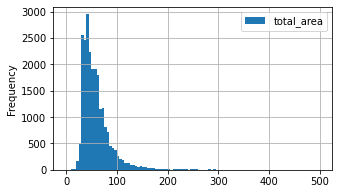

In [26]:
data
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
data['total_area'].describe()

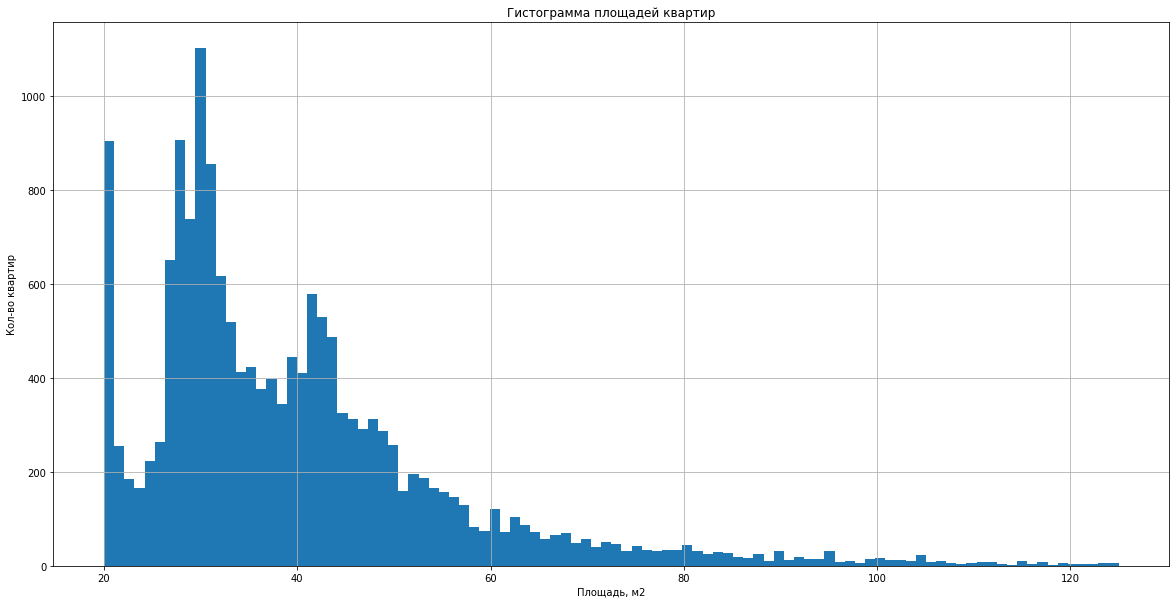

In [60]:

ax = data['living_area'].hist(bins=100, range=(20, 125), figsize=(20,10))\
    .set(title = 'Гистограмма площадей квартир', xlabel = 'Площадь, м2', ylabel = 'Кол-во квартир')

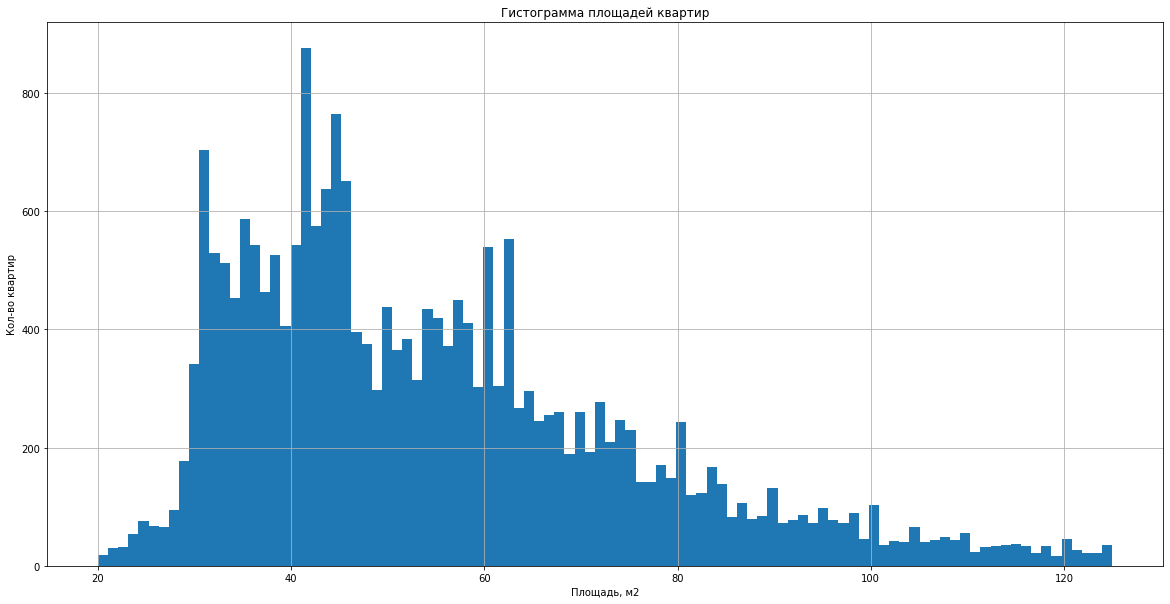

In [28]:
ax =data['total_area'].hist(bins=100, range=(20, 125), figsize=(20,10))\
    .set(title = 'Гистограмма площадей квартир', xlabel = 'Площадь, м2', ylabel = 'Кол-во квартир')

 - жилая площадь; в задании указано. этот параметр тоже описать и сделать график:)

В Основном преобладают квартиры - от 35 м2 65 м2 меньше всего объявлений квартир от 120 м2

Посмотрим теперь жилую площадь 

Жилая площадь у объектов с общей площадью от 50 м 2, исходя из прошлого графика, переместилась к уменьшению (общая площадь, больше жилой)

площадь кухни:

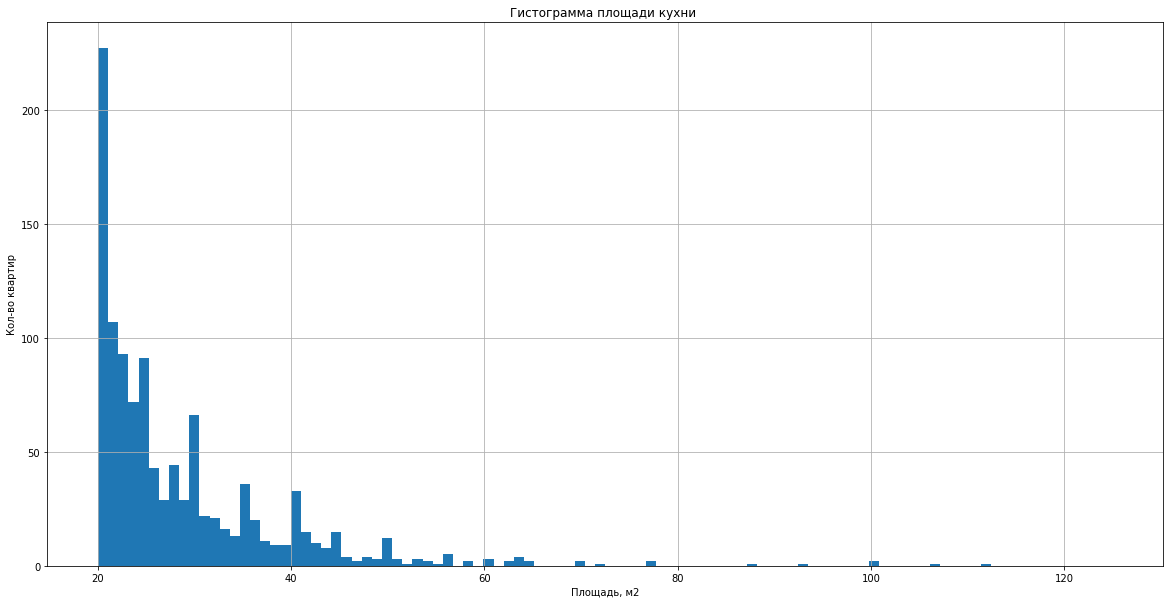

In [61]:
ax = data['kitchen_area'].hist(bins=100, range=(20, 125), figsize=(20,10))\
    .set(title = 'Гистограмма площади кухни ', xlabel = 'Площадь, м2', ylabel = 'Кол-во квартир') 

Большая часть объявлений с кухней 20 м2

count    2.338800e+04
mean     6.367316e+06
std      1.037268e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      7.630000e+08
Name: last_price, dtype: float64

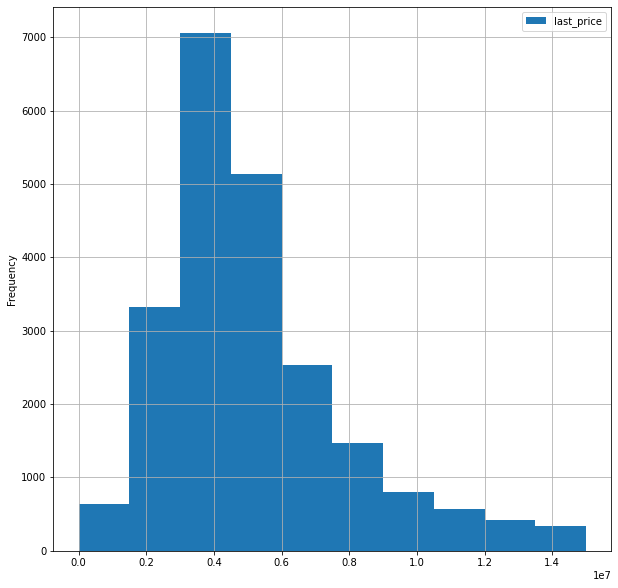

In [31]:
data.plot(y = 'last_price', kind = 'hist', grid=True, range = (0,15000000), figsize = (10,10))
data['last_price'].describe() 

Большая часть объявлений стоят от 4 - 7 млн рублей

count    23388.000000
mean         2.056910
std          1.062692
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

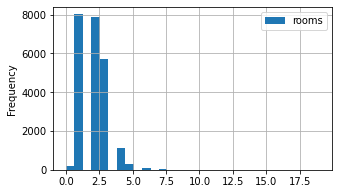

In [32]:
data
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
data['rooms'].describe()

    большая часть составляет 2-3 комнатные квартиры  

count    23388.000000
mean         2.666898
std          0.182907
min          2.400000
25%          2.600000
50%          2.600000
75%          2.700000
max          3.500000
Name: ceiling_height, dtype: float64

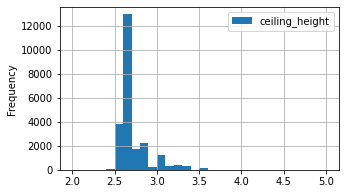

In [33]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (5,3))
data['ceiling_height'].describe()

В основном преобладают потолки от 2.5- до 3 метров

count    23388.000000
mean         5.920344
std          4.900858
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

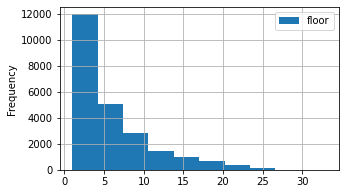

In [34]:
data.plot(y = 'floor', kind = 'hist', bins = 10, range = (1,33), grid=True, figsize = (5,3))
data['floor'].describe()

Большая часть квартир располагается с 1-4 этаж, максимальный 33 этаж

тип этажа квартиры («первый», «последний», «другой»);

<AxesSubplot:>

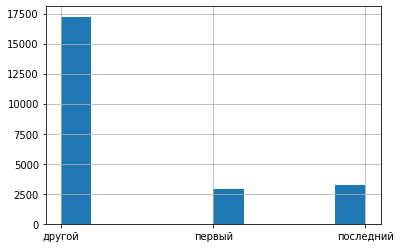

In [35]:
data['new_floor'].hist()

 первый и последний этаж встречается редко - примерно в одинаковых долях 

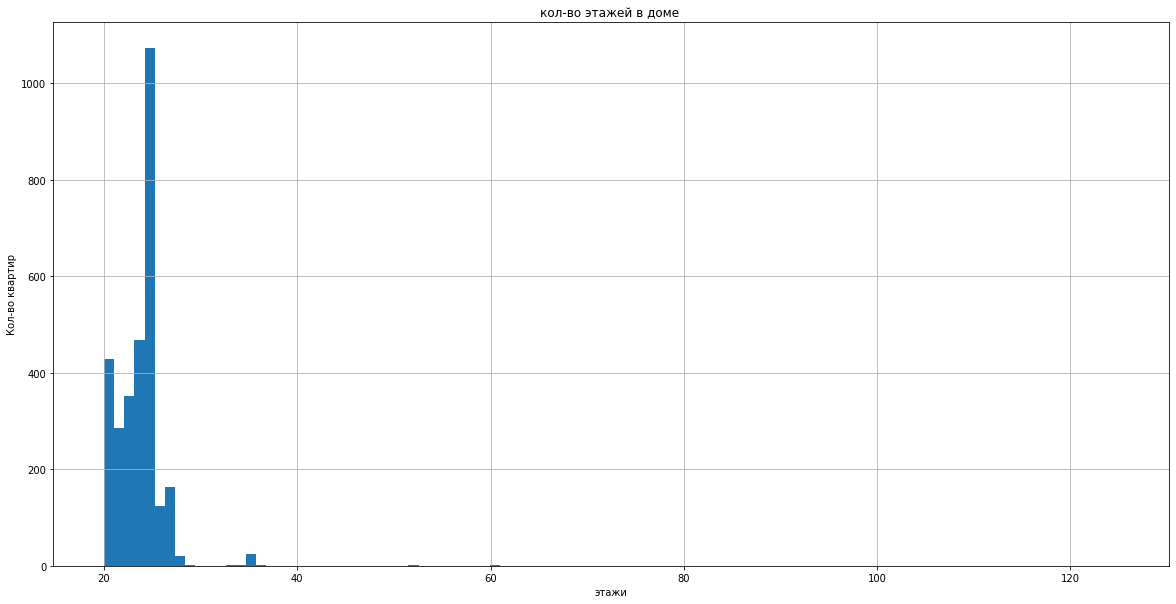

In [64]:
ax = data['floors_total'].hist(bins=100, range=(20, 125), figsize=(20,10))\
    .set(title = 'кол-во этажей в доме ', xlabel = 'этажи', ylabel = 'Кол-во квартир')   

Больше всего объявлений о продаже в 25-этажных домах.

расстояние до центра города в метрах:

<AxesSubplot:>

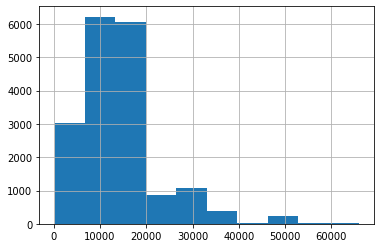

In [37]:
data['cityCenters_nearest'].hist() 

 Можно сделать вывод, что большая часть объявлений это бъекты которые находятся в 10-20тыс м от центра города

расстояние до ближайшего аэропорта

<AxesSubplot:>

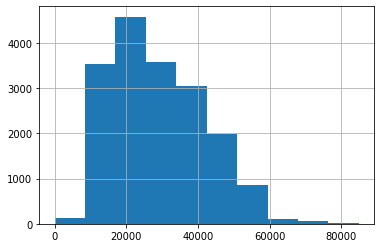

In [38]:
data['airports_nearest'].hist() 

Больше всего объектов в близи с аэропортом, в 20-25 тыс м

расстояние до ближайшего парка

<AxesSubplot:>

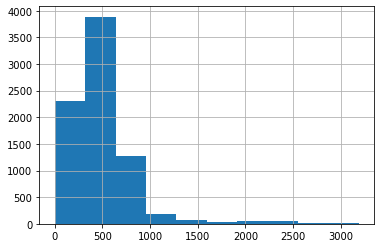

In [39]:
data['parks_nearest'].hist() 

Почти в 80 процентах - парк находтися рядом с обьъектом


день и месяц публикации объявления

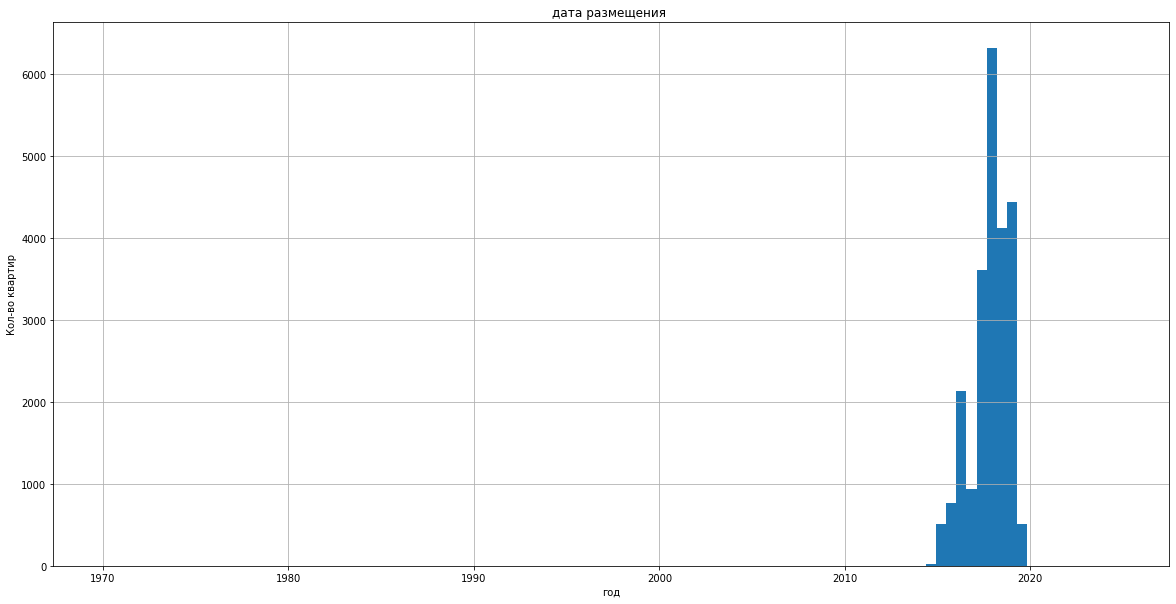

In [70]:
  ax = data['first_day_exposition'].hist(bins=100, range=(20, 20000), figsize=(20,10))\
    .set(title = 'дата размещения ', xlabel = 'год', ylabel = 'Кол-во квартир') 

В основном публикации свежие, пик пришел на 2017 год

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'locality_name_new', 'price_of_m2',
       'year', 'month', 'day', 'new_floor', 'living_area_part',
       'kitchen_area_part', 'cityCenters_nearest_km'],
      dtype='object')


count    20275.000000
mean       179.989544
std        218.921094
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

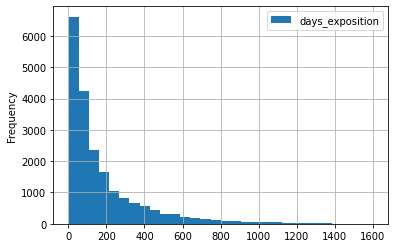

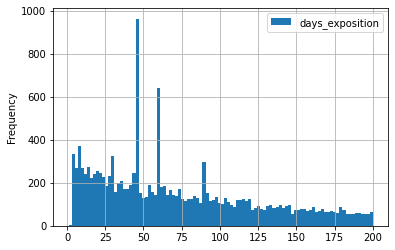

In [41]:
print(data.columns)

#диаграмма размаха


data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

#среднее значение, медиана и межквартильный размах
data[data['days_exposition']!=0]['days_exposition'].describe()
#data[data['days_exposition']!=0]['days_exposition'].value_counts()

    Самая быстрая продажа составила 45 дней и самая долгая 230 дней

 "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);

0.2878074342452342

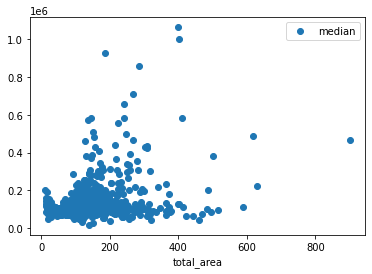

In [42]:
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'price_of_m2', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

data['total_area'].corr(data['price_of_m2'])

Можно сделать вывод, чем больше площадь тем немного выше стоимость ( зависимость очень слабая)

0.2086846046766243

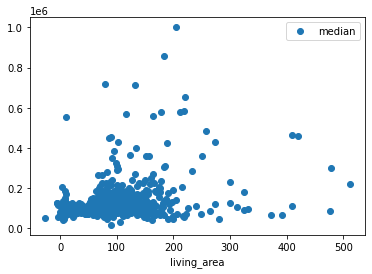

In [43]:
pivot_table_total_area = data.pivot_table(index = 'living_area', values = 'price_of_m2', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

data['living_area'].corr(data['price_of_m2'])

Зависимость проследуется, чем выше жилая площадь чуть выше цена

0.3573115179860498

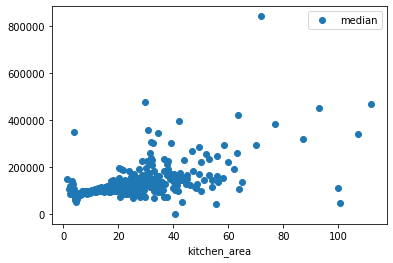

In [44]:
pivot_table_total_area = data.pivot_table(index = 'kitchen_area', values = 'price_of_m2', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

data['kitchen_area'].corr(data['price_of_m2'])

зависимость не наблюдается

0.03992565342171584

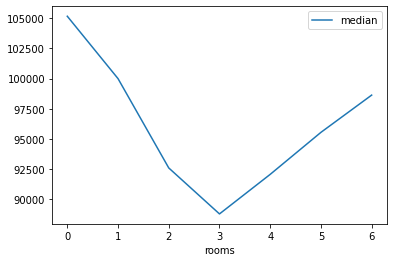

In [45]:
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'price_of_m2', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')

pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)

data['rooms'].corr(data['price_of_m2'])

чем ближе количество комнат к 3 тем ниже стоимость квадратного метра.

Изучим зависимость цены квадратного метра от этажа (первого или последнего)

,mean,count,median
new_floor,,,
первый,81629.47710,2884,81136.213174
последний,92216.23091,3267,87301.587302


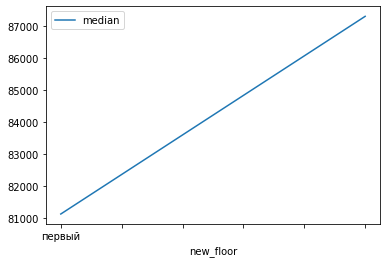

In [46]:
pivot_table_floor_category = data.query('new_floor != "другой"').pivot_table(index = 'new_floor', values = 'price_of_m2', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
pivot_table_floor_category

Согласно медиане - как правило квартиры на первом этаже дешевле квартир на последнем этаже - в среднем на 10%!

Изучим зависимость цены квадратного метра от даты размещения:

,mean,count,median
day,,,
2 - вторник,99417.516981,4140,95472.370766
3 - среда,98958.951675,3917,95238.095238
4 - четверг,99193.552474,4219,95000.000000
1 - понедельник,98878.723099,3559,94504.310345
5 - пятница,98493.613125,3948,94503.803983
7 - воскресенье,97043.998344,1683,94488.188976
6 - суббота,98740.690163,1922,93473.364669


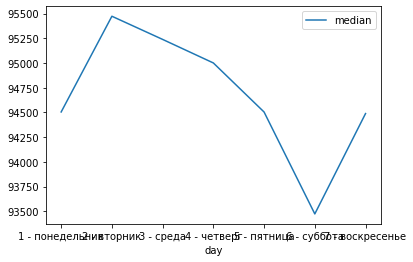

In [47]:
pivot_table_weekday_exposition = data.pivot_table(index = 'day', values = 'price_of_m2', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

Полагаю, что стоимость выставленной на продажу недвижимости зависит от общей активности людей, так как именно в рабочие дни мы видим более высокие цены. Думаю, люди более активно занимаются сделками в выходные, повышается спрос, и поэтому цены ниже

,mean,count,median
month,,,
4,101310.169562,2352,96144.230769
8,99413.285421,1728,95883.848999
9,100246.417134,1957,95541.401274
11,98869.308869,2343,95522.388060
3,98514.703050,2544,95200.000000
1,99004.015443,1478,95097.126275
2,98467.124146,2608,94943.660638
7,98017.139299,1661,94642.857143
10,97423.152188,2099,94135.802469


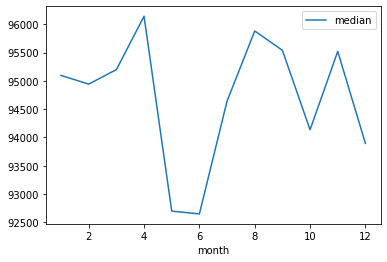

In [48]:
pivot_table_month_exposition = data.pivot_table(index = 'month', values = 'price_of_m2', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')
pivot_table_month_exposition.sort_values('median', ascending = False)

К летнему сезону наблюдается резкий спад, скореее всего из-за отпусков. Ближе к осени начинается подъем. Пик наблюдался в апреле


,mean,count,median
year,,,
2014,124620.777842,136,106901.898734
2019,106733.256939,2839,103125.000000
2018,97392.141215,8430,95573.951623
2015,102413.245414,1164,93051.446417
2017,96936.254930,8076,92329.203730
2016,97896.114686,2743,91666.666667


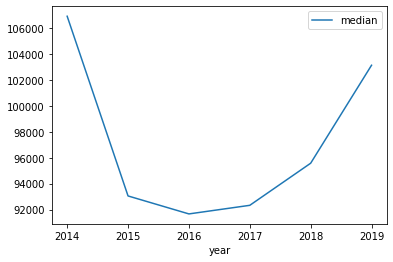

In [49]:
pivot_table_year_exposition = data.pivot_table(index = 'year', values = 'price_of_m2', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')
pivot_table_year_exposition.sort_values('median', ascending = False)

Из-за падение рубля, палагаю был упадок и в цене на недвижимость

In [50]:
median_price_meter = data.pivot_table(index='locality_name', values='price_of_m2', aggfunc=['count', 'median', 'mean'])
median_price_meter.columns = ['count', 'median', 'mean']
median_price_meter.sort_values('count', ascending=False).head(10)

,count,median,mean
locality_name,,,
Санкт-Петербург,15463,104615.384615,114124.436877
посёлок Мурино,520,85890.216628,85725.591169
посёлок Шушары,439,76829.268293,78655.731673
Всеволожск,395,65789.473684,68617.952063
Пушкин,364,99993.589744,102605.318089
Колпино,338,74723.748474,75424.334684
посёлок Парголово,327,91642.857143,90177.239529
Гатчина,305,67924.528302,68811.320527
деревня Кудрово,299,91860.465116,92471.979163


Санкт-Петербурге больше всего предложений и средняя цена метра значительно выше всех остальных населенных пунктов. Ну а дешевые квадратные метры стоит искать в Выборге.

,price_of_m2
cityCenters_nearest_km,
0,181934.195704
1,163876.446608
2,143541.513879
3,128639.070524
4,136915.384375
5,146366.371857
6,150954.562750
7,141330.545736
8,119861.533763


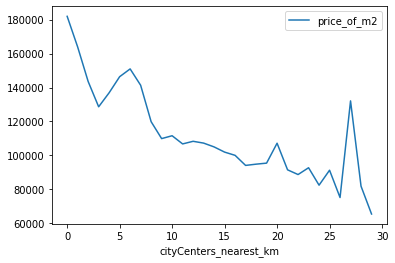

In [51]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(999999)
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')
pivot_table_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=999999').pivot_table(index = 'cityCenters_nearest_km', values = 'price_of_m2', aggfunc = 'mean')
pivot_table_km.plot()
pivot_table_km

Самая высокая стоимость оказалась в 3 км от центра.

### Общий вывод

Мы провели ряд исследований, и уже можем точно сказать, какие параметры влияют на определение рыночной стоимости квартиры.

общая площадь (50-60 кв.м. это золотая середина для квартир)
число комнат (2-комнатные квартиры самые популярные)
этаж квартиры(люди все также стараются избегать первый и последний этаж, хотя эта тенденция постепенно меняется)
расстояние от центра города (чем ближе к центру тем увеличивается цена, да и спрос на такие квартиры всегда повышенный)


Можно отметить довольно сильную зависимость стоимости квартир от количества комнат, влияет также и этаж, но примерно с такой же силой как и в общем по таблице данных. Также ясно видна зависимость от расстояния до центра, с удалением соответственно будет падать и цена.
Наибольшую активность продавцы проявляют в первые пять дней недели.
Самая быстрая продажа наблюдалась за 45 дней, а самая долгая за 230 дней.